## Background
The Sherline lathe that is currently in use at the UTA fablab has two major drawbacks that present unique challanges. <br>
* It is not capeable of operating in constant surface speed (CSS) mode. <br>
* It has low torque, when the parting tool initially makes contact with the <br>
   work piece, and thus the radius and torque are maximum, the motor is prone to being <br> 
   over torqued, jamming, and causing the almost finished piece to fail. <br>
   
To overcome these challanges, adjusting the feedrate to achieve a desired chip thickness, without over torquing <br>
the motor is necessay. To do this, the manufactures motor torque curve will be used to determine cutting force <br>
as a function of rpm, chip thickness (which is it's self a function of rpm and feed rate), and the stock material <br> 

### Tooling Data
[external link](https://www.accusizetools.com/7-pieces-set-indexable-carbide-turning-tools/)<br>
### Motor Torque Curve
<img src="motor_crv.jpg" style="width: 400px;"/>

## Analysis

In [192]:
from matplotlib import pyplot as plt
from numpy import arange
from sympy import symbols, solve
from math import pi, sqrt

In [193]:
# generate equation for motor torqe as a function or rpm's
x1 = 220  # oz-in
x2 = 460  # oz-in
y1 = 2800 # rpm
y2 = 100  # rpm

slope = (y2 - y1)/(x2 - x1)  # rpm/oz-in
# y1 - y2 = slope*(x1 - x2)
# 2800 - 0 = slope*(220 - x)
# (2800/slope) - 220 = -x
# 220 - (2800/slope) = x 
intercept = (x1 - (y1/slope))

# torque = rpm/slope + intercept oz-in
def tor(rpm: float):
    oz_in = ((rpm/slope) + intercept)
    Nm = oz_in / 141.6119322780592 
    return Nm

In [194]:
t_max = tor(200)
print(f'max torque {t_max:0.2f}... what a piece of crap')

max torque 3.19... what a piece of crap


In [195]:
# solve for chip thickness from experiments that went well
feed = 0.055  # ipm
speed = 477  # rpm
R = (25.4/(2*1000))  # radius in m
ct = feed/speed  # in/rev
ct = ct*(25.4/1000)  # m/rev
ct = ct/(2*pi)  # m/rad
print(f'chip thickness that worked well was {ct:.2E} m/rad')

chip thickness that worked well was 4.66E-07 m/rad


In [196]:
# solve for F/width = P*w from experiments that went well
T = tor(speed)  # Nm
speed = speed*2*pi/60  # rad/s
Pw = T/(ct*R) # N/m
print(f'Maximum pressure*width ~ Force/width {Pw:.3E} N/m')

Maximum pressure*width ~ Force/width 5.088E+08 N/m


At this point in the analysis, we have shown that the maximum pressure*width can be found <br>
using the motor torque curve from sherline. That being said the problem becomes relating force <br>
to the stock material...

### Proposed solution <br>
* Hold rpm and thus motor torque constant.
* Machine down stock such that it is smooth, and the blade will contact evenly.
* Measure the radius as accurately as possible.
* Find a speed and feed that produces desireable chips.
* Move to a fresh spot, increase the feed, and try again.
* Repeat until the motor is over torqed.
* Use this data point to generate a linear equation for the Pw to Ct curve at the origin and the point collected.
* The slope of the line will be the pressure as a function of chip thickness

** Ensure the radius is sufficently small such that it's contribution to counter torque is negligible

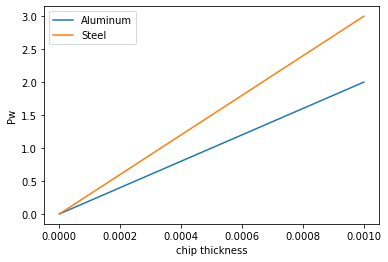

In [197]:
fig, ax = plt.subplots()
ax.plot([0, 0.001], [0, 2], label='Aluminum')
ax.plot([0, 0.001], [0, 3], label="Steel")
ax.set_xlabel('chip thickness')
ax.set_ylabel('Pw')
ax.legend();
# The slope of the line would represent Pw as a function of chip thickness, i.e. (Pw(ct)). This value should be unique between materials

### Additional Parameters to consider
* SFM, a function of rpm and radius
* MRR, a function of SFM, chip thickness, and tool width
* Manufacture's recommended chip thickness

### Prototype using known values

In [198]:
ipm = 0.080
rpm = 477
R = 0.5*25.4/1000  #m
T = tor(477)  # N/m
ct = ipm/rpm  # inches/rev
ct = ct*(25.4/1000)  # m/rev
ct = ct/(2*pi)  # m/rad
Pw_crit = T/(ct*R)
curve = Pw_crit/ct
curve  # F/unit_length/m

515885402302758.06

In [199]:


def ct_to_metric(ct: float):
    ct = ct*(25.4/1000)  # m/rev
    ct = ct/(2*pi)  # m/rad
    return ct

def ct_to_in(ct: float):
    ct = ct*2*pi  # m/rev
    ct = ct*1000/25.4  # in/rev
    return ct

def solve(rpm, R, curve, ct_max=0.08/477):
    T = tor(rpm)
    ct = sqrt(T/(curve*R))
    ct = ct_to_in(ct)
    if ct < ct_max:
        feed = ct*rpm
    else:
        feed = ct_max*rpm
    return feed

for r in arange(0.5, 0, -0.001):
    R = (r*25.4/1000)
    print(solve(477, R, 515885402302758.06))
        


0.07999999999999999
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
